In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import schrutepy
from schrutepy import schrutepy 

In [58]:
import nltk
from nltk.corpus import stopwords

## load script

In [4]:
script = schrutepy.load_schrute()

In [5]:
script.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [6]:
script.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             55130 non-null  int64 
 1   season            55130 non-null  int64 
 2   episode           55130 non-null  int64 
 3   episode_name      55130 non-null  object
 4   director          55130 non-null  object
 5   writer            55130 non-null  object
 6   character         55130 non-null  object
 7   text              54756 non-null  object
 8   text_w_direction  55125 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.8+ MB


In [16]:
def schrut_prep(df):
    df.drop(columns=['index'], axis=1, inplace=True)

    df.drop(df[df.text_w_direction.isna()].index, axis=0, inplace=True)
    
    df.rename(columns={'episode_name':'title','text_w_direction':'text_w'},inplace=True)
    
    return df

In [17]:
script = schrut_prep(script)

In [18]:
script.head()

,season,episode,title,director,writer,character,text,text_w
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [36]:
script_nn = script.dropna()

## load episode properties

In [28]:
df = pd.read_csv('imdb.csv')

In [29]:
df.head()

,season,title,rating,votes,double,episode,month,director,writer
0,1,Pilot,7.4,7006,0,1,3,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels
1,1,Diversity Day,8.3,6902,0,2,3,Ken Kwapis,B.J. Novak
2,1,Health Care,7.7,5756,0,3,4,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,8.0,5579,0,4,4,Bryan Gordon,Michael Schur
4,1,Basketball,8.4,6183,0,5,4,Greg Daniels,Greg Daniels


# Rating distribution

<AxesSubplot:xlabel='rating', ylabel='Count'>

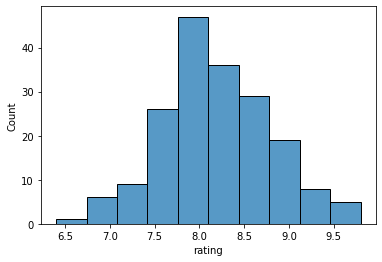

In [10]:
sns.histplot(df.rating, bins=10)

<AxesSubplot:xlabel='season', ylabel='rating'>

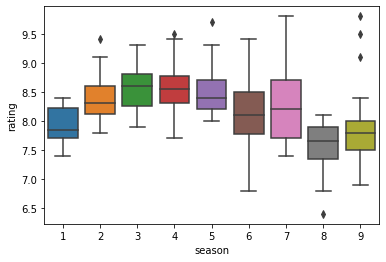

In [11]:
sns.boxplot(x=df.season, y=df.rating)

<AxesSubplot:ylabel='rating'>

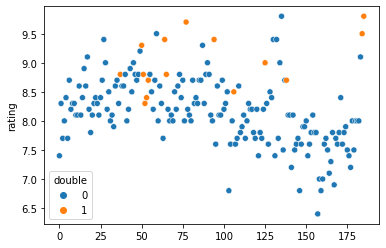

In [27]:
sns.scatterplot(x=df.index,y=df.rating,hue=df.double)

<AxesSubplot:xlabel='month', ylabel='rating'>

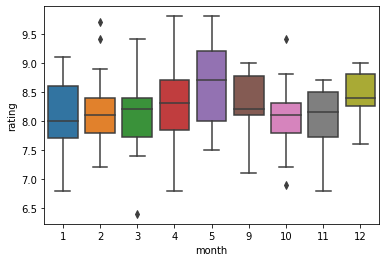

In [21]:
sns.boxplot(x=df.month, y=df.rating)

In [24]:
df[df.double==1].rating.mean()

9.006666666666668

In [25]:
df[df.double==0].rating.mean()

8.141520467836257

In [34]:
df.groupby('writer').mean().rating.sort_values(ascending=False)

writer
Greg Daniels;Mindy Kaling                      9.400000
Paul Lieberstein;Michael Schur                 9.300000
Jennifer Celotta;Greg Daniels                  9.200000
Jennifer Celotta;Paul Lieberstein              9.200000
Warren Lieberstein;Halsted Sullivan            8.800000
Steve Carell                                   8.800000
Lee Eisenberg;Gene Stupnitsky;Michael Schur    8.800000
Charlie Grandy                                 8.700000
Michael Schur;Lee Eisenberg;Gene Stupnitsky    8.600000
Lester Lewis                                   8.600000
Greg Daniels                                   8.600000
Justin Spitzer                                 8.566667
Paul Lieberstein                               8.522222
Brent Forrester;Justin Spitzer                 8.500000
Michael Schur                                  8.485714
Brent Forrester                                8.450000
Lee Eisenberg;Gene Stupnitsky                  8.450000
Ryan Koh                                 

In [35]:
df.groupby('director').mean().rating.sort_values(ascending=False)

director
Steve Carell                     9.300000
Harold Ramis                     8.933333
Dean Holland                     8.700000
Lee Eisenberg;Gene Stupnitsky    8.700000
Joss Whedon                      8.700000
Jason Reitman                    8.700000
Charles McDougall                8.650000
Julian Farino                    8.650000
Jeffrey Blitz                    8.640000
Paul Lieberstein                 8.633333
Paul Feig                        8.615385
Greg Daniels                     8.600000
Bryan Gordon                     8.550000
Stephen Merchant                 8.500000
J.J. Abrams                      8.500000
Ken Kwapis                       8.409091
Tucker Gates                     8.366667
Ken Whittingham                  8.325000
Randall Einhorn                  8.322222
Craig Zisk                       8.300000
Brent Forrester                  8.300000
Dennie Gordon                    8.150000
Victor Nelli Jr.                 8.050000
Jennifer Celotta         

# Most popular words

In [88]:
text = ' '.join( word for word in script_nn[(script_nn.season==1) & (script_nn.episode==1)].text)

text = text.split(" ")
len(text)

2756

In [89]:
fdist1 = nltk.FreqDist(text)
print (fdist1.most_common(50))

[('I', 83), ('the', 71), ('to', 68), ('you', 65), ('a', 59), ('is', 40), ('of', 32), ('it', 30), ('in', 28), ('be', 27), ('and', 26), ('have', 26), ('that', 24), ("I'm", 23), ('my', 22), ('You', 21), ('for', 18), ('this', 18), ('just', 18), ('was', 16), ('we', 16), ('with', 16), ('going', 15), ('out', 14), ('OK.', 13), ("don't", 13), ('think', 13), ("It's", 13), ('about', 13), ('me', 12), ('know', 12), ('tell', 12), ('So', 11), ('This', 11), ('Just', 11), ('can', 11), ('on', 11), ('not', 11), ('are', 10), ('your', 10), ('Yeah.', 10), ('No,', 10), ('no,', 10), ('And', 10), ('gonna', 10), ("That's", 10), ('All', 9), ('at', 9), ('you.', 9), ('what', 9)]


In [87]:
fdist1 = nltk.FreqDist(text)
print (fdist1.most_common(50))

[('the', 2), ('I', 2), ('All', 1), ('right', 1), ('Jim.', 1), ('Your', 1), ('quarterlies', 1), ('look', 1), ('very', 1), ('good.', 1), ('How', 1), ('are', 1), ('things', 1), ('at', 1), ('library?', 1), ('Oh,', 1), ('told', 1), ('you.', 1), ("couldn't", 1), ('close', 1), ('it.', 1), ('So...', 1), ('So', 1), ("you've", 1), ('come', 1), ('to', 1), ('master', 1), ('for', 1), ('guidance?', 1), ('Is', 1), ('this', 1), ('what', 1), ("you're", 1), ('saying,', 1), ('grasshopper?', 1)]


In [84]:
text.dispersion_plot('sorry')

AttributeError: 'list' object has no attribute 'dispersion_plot'

In [53]:
script_nn.iloc[11].text

'Uh, yeah. Just a fax.'